In [48]:
import os
import torch
import pandas as pd
from pymatgen.core.structure import Structure
from pymatgen.io.cif import CifParser
from collections import defaultdict
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.preprocessing import MinMaxScaler

def parse_composition_from_cif(file_path):
    try:
        structure = Structure.from_file(file_path)
        comp = structure.composition
        return dict(comp.as_dict())
    except Exception as e:
        print(f"Error parsing {file_path}: {e}")
        return None

def compute_basic_descriptors(composition):
    """
    Computes basic descriptors based on elemental composition.
    """
    num_atoms = sum(composition.values())
    mol_weight = sum(Descriptors.MolWt(Chem.MolFromSmiles(f"[{elem}]")) * count for elem, count in composition.items())
    return {
        'NumAtoms': num_atoms,
        'MolecularWeight': mol_weight,
        # Add other descriptors as needed
    }

def create_feature_vectors(cif_folder):
    all_elements = set()
    compositions = []
    descriptor_keys = None
    
    # Parse CIF files
    for file in os.listdir(cif_folder):
        if file.endswith('.cif'):
            comp = parse_composition_from_cif(os.path.join(cif_folder, file))
            if comp:
                compositions.append(comp)
                all_elements.update(comp.keys())
    
    # Check if no valid compositions were found
    if not compositions:
        raise ValueError("No valid compositions found. Check your CIF files.")
    
    # Extract features
    feature_vectors = []
    for comp in compositions:
        vector = [comp.get(elem, 0) for elem in all_elements]
        descriptors = compute_basic_descriptors(comp)
        if descriptors and descriptor_keys is None:
            descriptor_keys = sorted(descriptors.keys())

        if descriptors:
            vector.extend([descriptors[desc] for desc in descriptor_keys])
        else:
            vector.extend([0] * len(descriptor_keys))  # Ensure same length even if descriptors are missing
        feature_vectors.append(vector)
    
    feature_vectors = np.array(feature_vectors)
    scaler = MinMaxScaler()
    normalized_feature_vectors = scaler.fit_transform(feature_vectors)
    
    return normalized_feature_vectors, list(all_elements) + descriptor_keys, list(all_elements), scaler

# def normalize_features(feature_vectors):
#     scaler = MinMaxScaler()
#     normalized_vectors = scaler.fit_transform(feature_vectors)
#     return normalized_vectors

def save_to_pytorch_format(feature_vectors, columns, output_file):
    df = pd.DataFrame(feature_vectors, columns=columns)
    tensor = torch.tensor(df.values, dtype=torch.float32)
    torch.save(tensor, output_file)

# def main(cif_folder, output_file):
#     feature_vectors, columns, elements_list = create_feature_vectors(cif_folder)
#     normalized_vectors = normalize_features(feature_vectors)
#     save_to_pytorch_format(normalized_vectors, columns, output_file)
#     print(f"Data saved to {output_file} in PyTorch format.")

# if __name__ == "__main__":
#     cif_folder = "CHILI-3K_data/CHILI-3K_raw_cifs/"  # Replace with the path to your CIF files folder
#     output_file = "output.pt"          # Replace with the desired output file name
#     main(cif_folder, output_file)


/home/frjo/miniconda3/envs/decifer_env/lib/python3.9/site-packages/pymatgen/io/cif.py:1147: UserWarning: Issues encountered while parsing CIF: Some fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


['Nb', 'Ag', 'Ni', 'Tl', 'Cu', 'Sr', 'B', 'Hf', 'Bi', 'Sn', 'Os', 'Sb', 'K', 'Pb', 'O', 'Ga', 'Sc', 'In', 'Au', 'Rb', 'W', 'Cd', 'Ir', 'Fe', 'Ti', 'Mo', 'Ta', 'Mg', 'Pt', 'Na', 'Ca', 'Y', 'Te', 'Ba', 'Ra', 'Cr', 'Hg', 'Be', 'Si', 'Ge', 'Rh', 'Re', 'Al', 'As', 'V', 'Li', 'Ru', 'Pd', 'Tc', 'Co', 'Mn', 'Zn', 'Zr', 'Cs']
Epoch 1, Train Loss: 38.75978508896715, Validation Loss: 38.005760192871094
Epoch 2, Train Loss: 37.33319067767286, Validation Loss: 36.6173210144043
Epoch 3, Train Loss: 35.99510529285341, Validation Loss: 35.304094314575195
Epoch 4, Train Loss: 34.68636135792169, Validation Loss: 34.124807357788086
Epoch 5, Train Loss: 33.31417522280235, Validation Loss: 32.99173164367676
Epoch 6, Train Loss: 32.11132199745479, Validation Loss: 31.392634868621826
Epoch 7, Train Loss: 30.60258555975486, Validation Loss: 30.50485897064209
Epoch 8, Train Loss: 29.39875168687715, Validation Loss: 28.282785892486572
Epoch 9, Train Loss: 28.28196079524483, Validation Loss: 27.726847171783447
E

Epoch 109, Train Loss: 2.409002198947696, Validation Loss: 2.406530439853668
Epoch 110, Train Loss: 2.398522474634366, Validation Loss: 2.3928173780441284
Epoch 111, Train Loss: 2.382946787856695, Validation Loss: 2.38011372089386
Epoch 112, Train Loss: 2.373956657770112, Validation Loss: 2.369423270225525
Epoch 113, Train Loss: 2.368877245685247, Validation Loss: 2.377556264400482
Epoch 114, Train Loss: 2.358362333042415, Validation Loss: 2.3657015562057495
Epoch 115, Train Loss: 2.3484303557027983, Validation Loss: 2.3645285964012146
Epoch 116, Train Loss: 2.3421246761412133, Validation Loss: 2.3368263840675354
Epoch 117, Train Loss: 2.3302724643016424, Validation Loss: 2.349270522594452
Epoch 118, Train Loss: 2.325542194636788, Validation Loss: 2.3233606815338135
Epoch 119, Train Loss: 2.3190907906359577, Validation Loss: 2.3324950337409973
Epoch 120, Train Loss: 2.3033990484523024, Validation Loss: 2.33295214176178
Epoch 121, Train Loss: 2.2998316456952432, Validation Loss: 2.32766

Epoch 218, Train Loss: 2.134729017422894, Validation Loss: 2.267169624567032
Epoch 219, Train Loss: 2.129451834310697, Validation Loss: 2.264675587415695
Epoch 220, Train Loss: 2.134903847701906, Validation Loss: 2.265023797750473
Epoch 221, Train Loss: 2.1330588483434965, Validation Loss: 2.2575129568576813
Epoch 222, Train Loss: 2.1341257245521845, Validation Loss: 2.2690339982509613
Epoch 223, Train Loss: 2.129011432016928, Validation Loss: 2.262218475341797
Epoch 224, Train Loss: 2.128609792454036, Validation Loss: 2.267787277698517
Epoch 225, Train Loss: 2.129516616580993, Validation Loss: 2.2605437636375427
Epoch 226, Train Loss: 2.131012526084119, Validation Loss: 2.2641152143478394
Epoch 227, Train Loss: 2.125928623469796, Validation Loss: 2.259501427412033
Epoch 228, Train Loss: 2.1265502013559416, Validation Loss: 2.261196196079254
Epoch 229, Train Loss: 2.1230972169891116, Validation Loss: 2.262326568365097
Epoch 230, Train Loss: 2.1224547934344433, Validation Loss: 2.264008

Epoch 330, Train Loss: 2.063929340032142, Validation Loss: 2.2607068717479706
Epoch 331, Train Loss: 2.0652024952445442, Validation Loss: 2.276043266057968
Epoch 332, Train Loss: 2.066238696180929, Validation Loss: 2.2679750621318817
Epoch 333, Train Loss: 2.063631005174532, Validation Loss: 2.2660699486732483
Epoch 334, Train Loss: 2.0614201027577317, Validation Loss: 2.2606822848320007
Epoch 335, Train Loss: 2.062547743789793, Validation Loss: 2.267085909843445
Epoch 336, Train Loss: 2.063066452506959, Validation Loss: 2.268213242292404
Epoch 337, Train Loss: 2.0612057062584586, Validation Loss: 2.2597747147083282
Epoch 338, Train Loss: 2.059764231283834, Validation Loss: 2.266651898622513
Epoch 339, Train Loss: 2.0580006847231407, Validation Loss: 2.271969646215439
Epoch 340, Train Loss: 2.0606131215733807, Validation Loss: 2.2639437317848206
Epoch 341, Train Loss: 2.059229880806029, Validation Loss: 2.2653358578681946
Epoch 342, Train Loss: 2.060448759184109, Validation Loss: 2.266

Epoch 443, Train Loss: 2.0232478689959668, Validation Loss: 2.299944907426834
Epoch 444, Train Loss: 2.0179494572436716, Validation Loss: 2.293042153120041
Epoch 445, Train Loss: 2.0222633767315723, Validation Loss: 2.2840056717395782
Epoch 446, Train Loss: 2.0178186236404057, Validation Loss: 2.2873694896698
Epoch 447, Train Loss: 2.0226089672779475, Validation Loss: 2.287915915250778
Epoch 448, Train Loss: 2.014369769359198, Validation Loss: 2.2877469658851624
Epoch 449, Train Loss: 2.016555688512607, Validation Loss: 2.3020077645778656
Epoch 450, Train Loss: 2.0181053266750544, Validation Loss: 2.2788917422294617
Epoch 451, Train Loss: 2.0202652262890433, Validation Loss: 2.2895050942897797
Epoch 452, Train Loss: 2.013289293904943, Validation Loss: 2.293564200401306
Epoch 453, Train Loss: 2.015787214744748, Validation Loss: 2.2862260341644287
Epoch 454, Train Loss: 2.0181973299642246, Validation Loss: 2.281774878501892
Epoch 455, Train Loss: 2.0110924187607653, Validation Loss: 2.29

Epoch 554, Train Loss: 1.9848995734387496, Validation Loss: 2.3232319056987762
Epoch 555, Train Loss: 1.9836220929003137, Validation Loss: 2.3272849321365356
Epoch 556, Train Loss: 1.9882473532609113, Validation Loss: 2.332810014486313
Epoch 557, Train Loss: 1.987007816945474, Validation Loss: 2.3294888138771057
Epoch 558, Train Loss: 1.984623218145896, Validation Loss: 2.3379566073417664
Epoch 559, Train Loss: 1.9826614800400622, Validation Loss: 2.331807792186737
Epoch 560, Train Loss: 1.9849841500830463, Validation Loss: 2.337006777524948
Epoch 561, Train Loss: 1.985380608265794, Validation Loss: 2.3242324590682983
Epoch 562, Train Loss: 1.9838818152119795, Validation Loss: 2.3298775255680084
Epoch 563, Train Loss: 1.9856323782853254, Validation Loss: 2.329099804162979
Epoch 564, Train Loss: 1.9822019141490066, Validation Loss: 2.325474113225937
Epoch 565, Train Loss: 1.9853980297178735, Validation Loss: 2.3210458755493164
Epoch 566, Train Loss: 1.984287907758097, Validation Loss: 2

Epoch 660, Train Loss: 1.9582485138900636, Validation Loss: 2.3713143169879913
Epoch 661, Train Loss: 1.9618514804389533, Validation Loss: 2.373712569475174
Epoch 662, Train Loss: 1.959300882234348, Validation Loss: 2.390297532081604
Epoch 663, Train Loss: 1.9582863830205963, Validation Loss: 2.3723036646842957
Epoch 664, Train Loss: 1.9562728836780459, Validation Loss: 2.372477352619171
Epoch 665, Train Loss: 1.9598923855879176, Validation Loss: 2.3630605936050415
Epoch 666, Train Loss: 1.9606394354752668, Validation Loss: 2.3755983710289
Epoch 667, Train Loss: 1.9558118985393855, Validation Loss: 2.374237686395645
Epoch 668, Train Loss: 1.9597350893996832, Validation Loss: 2.368448704481125
Epoch 669, Train Loss: 1.9563923708097202, Validation Loss: 2.372673988342285
Epoch 670, Train Loss: 1.9580618565476786, Validation Loss: 2.3827559649944305
Epoch 671, Train Loss: 1.955964313717339, Validation Loss: 2.372275650501251
Epoch 672, Train Loss: 1.9594024523036686, Validation Loss: 2.36

Epoch 772, Train Loss: 1.912527970441683, Validation Loss: 2.424064874649048
Epoch 773, Train Loss: 1.9103568369948019, Validation Loss: 2.4149386882781982
Epoch 774, Train Loss: 1.906792115038774, Validation Loss: 2.428486168384552
Epoch 775, Train Loss: 1.913576216209592, Validation Loss: 2.4304816722869873
Epoch 776, Train Loss: 1.9067566038116694, Validation Loss: 2.4110809564590454
Epoch 777, Train Loss: 1.9059970360102616, Validation Loss: 2.402562916278839
Epoch 778, Train Loss: 1.9093058278241495, Validation Loss: 2.411844551563263
Epoch 779, Train Loss: 1.9075044722068968, Validation Loss: 2.4204535484313965
Epoch 780, Train Loss: 1.9126315004243626, Validation Loss: 2.421012282371521
Epoch 781, Train Loss: 1.9093405430711161, Validation Loss: 2.41357284784317
Epoch 782, Train Loss: 1.9049437590471403, Validation Loss: 2.413382828235626
Epoch 783, Train Loss: 1.9060396885308695, Validation Loss: 2.4049031138420105
Epoch 784, Train Loss: 1.9024581233347495, Validation Loss: 2.4

Epoch 883, Train Loss: 1.8624881834495726, Validation Loss: 2.480630934238434
Epoch 884, Train Loss: 1.8603073405468558, Validation Loss: 2.470426380634308
Epoch 885, Train Loss: 1.8615514650119571, Validation Loss: 2.452864944934845
Epoch 886, Train Loss: 1.8608651874572273, Validation Loss: 2.4776161313056946
Epoch 887, Train Loss: 1.85827885274812, Validation Loss: 2.473296284675598
Epoch 888, Train Loss: 1.860074493828721, Validation Loss: 2.4513109922409058
Epoch 889, Train Loss: 1.8601549629151353, Validation Loss: 2.4742022156715393
Epoch 890, Train Loss: 1.8621767149196835, Validation Loss: 2.5004156827926636
Epoch 891, Train Loss: 1.8551562602125753, Validation Loss: 2.47316712141037
Epoch 892, Train Loss: 1.8588183695875753, Validation Loss: 2.471131682395935
Epoch 893, Train Loss: 1.8582794910340796, Validation Loss: 2.49980628490448
Epoch 894, Train Loss: 1.8541039744700034, Validation Loss: 2.489688754081726
Epoch 895, Train Loss: 1.8554520344171, Validation Loss: 2.469696

Epoch 997, Train Loss: 1.8225645906343235, Validation Loss: 2.586211085319519
Epoch 998, Train Loss: 1.8213318501870464, Validation Loss: 2.5685513019561768
Epoch 999, Train Loss: 1.821888405507005, Validation Loss: 2.574884831905365
Epoch 1000, Train Loss: 1.823041675597664, Validation Loss: 2.533835470676422


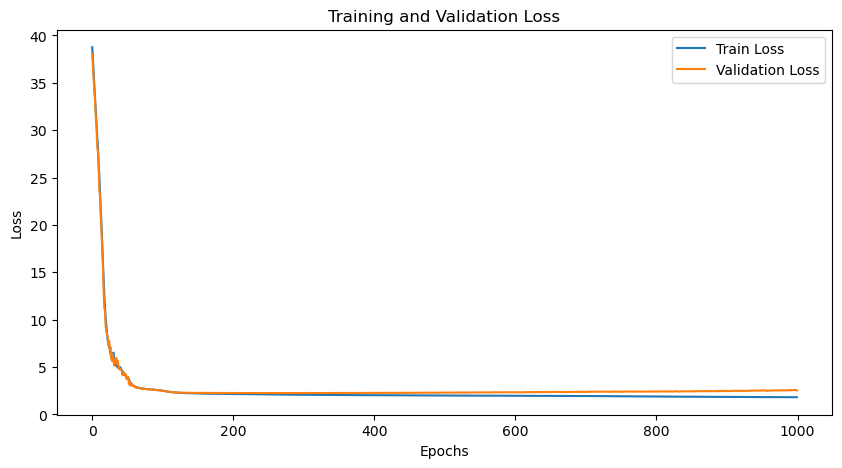

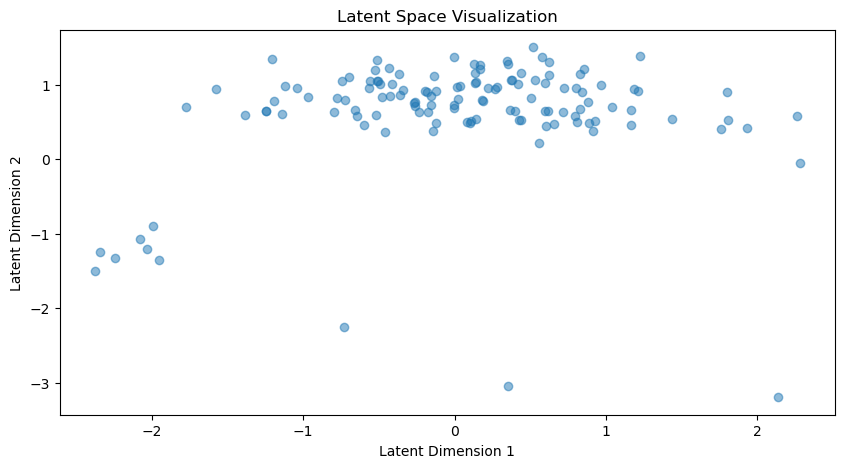

Original: Cu4O4 -> Reconstructed: O5
Original: Tl4O4 -> Reconstructed: O4
Original: O4Ga2 -> Reconstructed: O3
Original: O8As4 -> Reconstructed: O7
Original: O2Mo2 -> Reconstructed: O2
Original: O4Mn2 -> Reconstructed: O4
Original: PbO2 -> Reconstructed: O2
Original: O4Al4 -> Reconstructed: O3
Original: O4Zr2 -> Reconstructed: O4
Original: O4Pd8 -> Reconstructed: O6


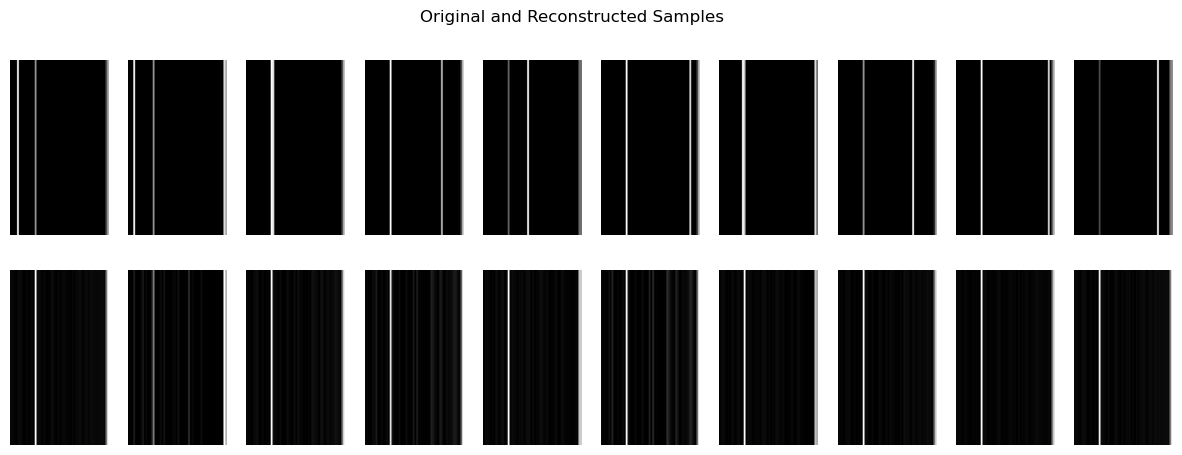

In [62]:
import os
import torch
import pandas as pd
from pymatgen.core.structure import Structure
from torch.utils.data import DataLoader, Dataset, random_split
from torch.distributions import Normal, Categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

class CIFDataset(Dataset):
    def __init__(self, data_tensor):
        self.data = data_tensor
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]

def load_data(file_path):
    data_tensor = torch.load(file_path)
    return data_tensor

def split_dataset(dataset, train_ratio=0.8):
    train_size = int(train_ratio * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    return train_dataset, val_dataset

def create_data_loaders(train_dataset, val_dataset, batch_size=32):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, val_loader

class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim, hidden_dim=128, num_components=10):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU()
        )
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()
        )
        self.num_components = num_components
        self.latent_dim = latent_dim
        self.pi = nn.Parameter(torch.ones(num_components) / num_components)
        self.mu = nn.Parameter(torch.randn(num_components, latent_dim))
        self.sigma = nn.Parameter(torch.ones(num_components, latent_dim))

    def encode(self, x):
        h = self.encoder(x)
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

    def sample_prior(self, batch_size):
        cat = Categorical(self.pi)
        component = cat.sample((batch_size,))
        mu = self.mu[component]
        sigma = self.sigma[component]
        z = mu + sigma * torch.randn_like(mu)
        return z

def loss_function(recon_x, x, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    KLD /= x.size(0)  # Normalize by batch size
    return BCE + KLD

def train_vae(vae, train_loader, val_loader, epochs=20, lr=1e-4):
    optimizer = optim.Adam(vae.parameters(), lr=lr)
    train_losses = []
    val_losses = []
    for epoch in range(epochs):
        vae.train()
        train_loss = 0
        for batch in train_loader:
            optimizer.zero_grad()
            recon_batch, mu, logvar = vae(batch)
            loss = loss_function(recon_batch, batch, mu, logvar)
            loss.backward()
            train_loss += loss.item()
            optimizer.step()
        
        train_loss /= len(train_loader.dataset)
        train_losses.append(train_loss)
        
        vae.eval()
        val_loss = 0
        with torch.no_grad():
            for batch in val_loader:
                recon_batch, mu, logvar = vae(batch)
                val_loss += loss_function(recon_batch, batch, mu, logvar).item()
        
        val_loss /= len(val_loader.dataset)
        val_losses.append(val_loss)
        
        print(f"Epoch {epoch+1}, Train Loss: {train_loss}, Validation Loss: {val_loss}")

    return train_losses, val_losses

def plot_losses(train_losses, val_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.show()

def plot_latent_space(vae, val_loader):
    vae.eval()
    latents = []
    with torch.no_grad():
        for batch in val_loader:
            mu, logvar = vae.encode(batch)
            z = vae.reparameterize(mu, logvar)
            latents.append(z.cpu().numpy())
    
    latents = np.concatenate(latents, axis=0)
    plt.figure(figsize=(10, 5))
    plt.scatter(latents[:, 0], latents[:, 1], alpha=0.5)
    plt.xlabel('Latent Dimension 1')
    plt.ylabel('Latent Dimension 2')
    plt.title('Latent Space Visualization')
    plt.show()

def plot_reconstructions(vae, val_loader, elements, scaler, num_element_features, num_samples=10):
    vae.eval()
    original_samples = []
    reconstructed_samples = []
    with torch.no_grad():
        for batch in val_loader:
            recon_batch, mu, logvar = vae(batch)
            original_samples.append(batch.cpu().numpy())
            reconstructed_samples.append(recon_batch.cpu().numpy())
            if len(original_samples) * batch.size(0) >= num_samples:
                break
    
    original_samples = np.concatenate(original_samples, axis=0)[:num_samples]
    reconstructed_samples = np.concatenate(reconstructed_samples, axis=0)[:num_samples]

    # Print the chemical compositions
    print_compositions(original_samples, reconstructed_samples, elements, scaler, num_element_features)
    
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        # Original
        plt.subplot(2, num_samples, i + 1)
        plt.imshow(original_samples[i].reshape(1, -1), cmap='gray', aspect='auto')
        plt.axis('off')
        
        # Reconstructed
        plt.subplot(2, num_samples, i + num_samples + 1)
        plt.imshow(reconstructed_samples[i].reshape(1, -1), cmap='gray', aspect='auto')
        plt.axis('off')
    
    plt.suptitle('Original and Reconstructed Samples')
    plt.show()
    
def feature_vector_to_composition(feature_vector, elements, scaler, num_element_features):
    # Inverse transform the normalization
    feature_vector = scaler.inverse_transform(feature_vector.reshape(1, -1)).flatten()
    
    composition = ""
    # Only process the element features part of the feature vector
#     print(num_element_features)
    element_features = feature_vector[:num_element_features]
    for i, element in enumerate(elements):
        if element_features[i] >= 1:
#             print(element_features[i])
            count = int(round(element_features[i]))
#             print(count)
            if count > 1:
                composition += f"{element}{count}"
            else:
                composition += f"{element}"
    return composition

def print_compositions(original, reconstructed, elements, scaler, num_element_features):
    for i in range(len(original)):
        original_comp = feature_vector_to_composition(original[i], elements, scaler, num_element_features)
        reconstructed_comp = feature_vector_to_composition(reconstructed[i], elements, scaler, num_element_features)
        print(f"Original: {original_comp} -> Reconstructed: {reconstructed_comp}")

def main(cif_folder, file_path, batch_size=32, train_ratio=0.8, epochs=1000, latent_dim=2, num_components=10):
    normalized_data, columns, elements, scaler = create_feature_vectors(cif_folder)
    print(elements)
    data_tensor = torch.tensor(normalized_data, dtype=torch.float32)
    
    dataset = CIFDataset(data_tensor)
    train_dataset, val_dataset = split_dataset(dataset, train_ratio)
    train_loader, val_loader = create_data_loaders(train_dataset, val_dataset, batch_size)
    
    input_dim = data_tensor.size(1)
    num_element_features = len(elements)
    vae = VAE(input_dim, latent_dim, num_components=num_components)
    train_losses, val_losses = train_vae(vae, train_loader, val_loader, epochs)
    
    plot_losses(train_losses, val_losses)
    plot_latent_space(vae, val_loader)
    plot_reconstructions(vae, val_loader, elements, scaler, num_element_features)

if __name__ == "__main__":
    cif_folder = "CHILI-3K_data/CHILI-3K_raw_cifs/"  # Replace with the path to your CIF files folder
    file_path = "output.pt"            # Replace with the desired output file name
    main(cif_folder, file_path)